In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV file

In [87]:
# Load the dataset
df = pd.read_csv("employee_wellbeing.csv")

In [88]:
df.head()

,EMP_ID,AGE,GENDER,STATUS,EMPLOYMENT,SUFFICIENT_INCOME,SALARY,TO_DO_COMPLETED,DAILY_STRESS,CORE_CIRCLE,...,SOCIAL_NETWORK,ACHIEVEMENT,FLOW,DAILY_STEPS,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_HOBBY,HEALTHY_DIET,WORK_LIFE_BALANCE_SCORE
0,1,36 to 50,Female,divorced,flight_attendant,1,Low,6,2,5,...,5,2,4,5,7,5,4,0,3,609.5
1,2,36 to 50,Female,married,checkin_agent,2,High,5,3,3,...,10,5,2,5,8,2,3,2,2,655.6
2,3,36 to 50,Female,married,checkin_agent,2,High,2,3,4,...,10,3,2,4,8,10,4,8,2,631.6
3,4,51 or more,Female,married,checkin_agent,1,Medium,3,3,3,...,7,2,5,5,5,7,5,2,3,622.7
4,5,51 or more,Female,in a relation,checkin_agent,1,Low,5,1,3,...,4,2,0,5,7,0,8,1,5,663.9


In [89]:
df.columns

Index(['EMP_ID', 'AGE', 'GENDER', 'STATUS', 'EMPLOYMENT', 'SUFFICIENT_INCOME',
       'SALARY', 'TO_DO_COMPLETED', 'DAILY_STRESS', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'FLOW',
       'DAILY_STEPS', 'SLEEP_HOURS', 'LOST_VACATION', 'PERSONAL_AWARDS',
       'TIME_FOR_HOBBY', 'HEALTHY_DIET', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

### Check for missing values and drop irrelevant columns

In [90]:
df.isnull().values.any()

False

In [91]:
df.dropna(inplace=True)
df.drop(columns=['EMP_ID'], inplace=True)

### Convert string datatypes to numeric

In [92]:
# Check the unique values in each of the following columns 
print('STATUS:', df['STATUS'].unique())
print('GENDER:', df['GENDER'].unique())
print('EMPLOYMENT:', df['EMPLOYMENT'].unique())
print('SALARY:', df['SALARY'].unique())
print('AGE:', df['AGE'].unique())


STATUS: ['divorced' 'married' 'in a relation' 'single']
GENDER: ['Female' 'Male']
EMPLOYMENT: ['flight_attendant' 'checkin_agent']
SALARY: ['Low' 'High' 'Medium']
AGE: ['36 to 50' '51 or more' '25 to 35' 'Less than 25']


In [93]:
# Convert string datatypes to numeric using mapping dictionaries
status_mapping = {'single': 0, 'divorced': 1, 'married': 2, 'in a relation': 3}
gender_mapping = {'Female': 0, 'Male': 1}
employment_mapping = {'flight_attendant': 0, 'checkin_agent': 1}
salary_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
age_mapping = {'Less than 25': 24, '25 to 35': 34, '51 or more': 51, '36 to 50': 49}

# Apply the mappings to the corresponding columns
df['GENDER'] = df['GENDER'].map(gender_mapping)
df['STATUS'] = df['STATUS'].map(status_mapping)
df['EMPLOYMENT'] = df['EMPLOYMENT'].map(employment_mapping)
df['SALARY'] = df['SALARY'].map(salary_mapping)
df['AGE'] = df['AGE'].map(age_mapping)

In [94]:
df.head()

,AGE,GENDER,STATUS,EMPLOYMENT,SUFFICIENT_INCOME,SALARY,TO_DO_COMPLETED,DAILY_STRESS,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,FLOW,DAILY_STEPS,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_HOBBY,HEALTHY_DIET,WORK_LIFE_BALANCE_SCORE
0,49,0,1,0,1,0,6,2,5,0,5,2,4,5,7,5,4,0,3,609.5
1,49,0,2,1,2,2,5,3,3,8,10,5,2,5,8,2,3,2,2,655.6
2,49,0,2,1,2,2,2,3,4,4,10,3,2,4,8,10,4,8,2,631.6
3,51,0,2,1,1,1,3,3,3,10,7,2,5,5,5,7,5,2,3,622.7
4,51,0,3,1,1,0,5,1,3,10,4,2,0,5,7,0,8,1,5,663.9


In [95]:
df.describe()

,AGE,GENDER,STATUS,EMPLOYMENT,SUFFICIENT_INCOME,SALARY,TO_DO_COMPLETED,DAILY_STRESS,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,FLOW,DAILY_STEPS,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_HOBBY,HEALTHY_DIET,WORK_LIFE_BALANCE_SCORE
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,40.560200,0.394600,1.473800,0.50590,1.576200,1.365100,5.700600,2.772800,5.490500,5.598500,6.581200,3.970100,3.114000,5.640600,7.067600,2.820200,5.741400,3.254500,2.946100,667.15655
std,9.756418,0.488789,1.116798,0.49999,0.494184,0.808744,2.642396,1.368345,2.856978,3.276884,3.088391,2.768171,2.342851,2.893764,1.222203,3.671406,3.110417,2.724275,1.457466,45.53700
min,24.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,480.00000
25%,34.000000,0.000000,0.000000,0.00000,1.000000,1.000000,4.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,3.000000,6.000000,0.000000,3.000000,1.000000,2.000000,636.10000
50%,34.000000,0.000000,1.000000,1.00000,2.000000,2.000000,6.000000,3.000000,5.000000,5.000000,7.000000,3.000000,3.000000,5.000000,7.000000,0.000000,5.000000,2.000000,3.000000,667.90000
75%,49.000000,1.000000,2.000000,1.00000,2.000000,2.000000,8.000000,4.000000,8.000000,10.000000,10.000000,6.000000,4.000000,8.000000,8.000000,5.000000,9.000000,5.000000,4.000000,699.00000
max,51.000000,1.000000,3.000000,1.00000,2.000000,2.000000,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,820.20000


### Graphical representation for work life balance score of the employees of different age groups 

Text(0.5, 1.0, 'WORK_LIFE_BALANCE_SCORE of the employees of different age groups')

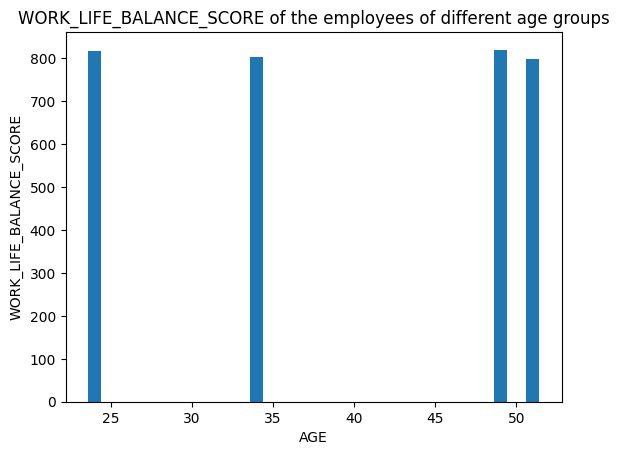

In [96]:
plt.bar('AGE', 'WORK_LIFE_BALANCE_SCORE', data =df)
plt.ylabel('WORK_LIFE_BALANCE_SCORE')
plt.xlabel('AGE')
plt.title('WORK_LIFE_BALANCE_SCORE of the employees of different age groups')

### Two bar charts for daily stress by gender and job role

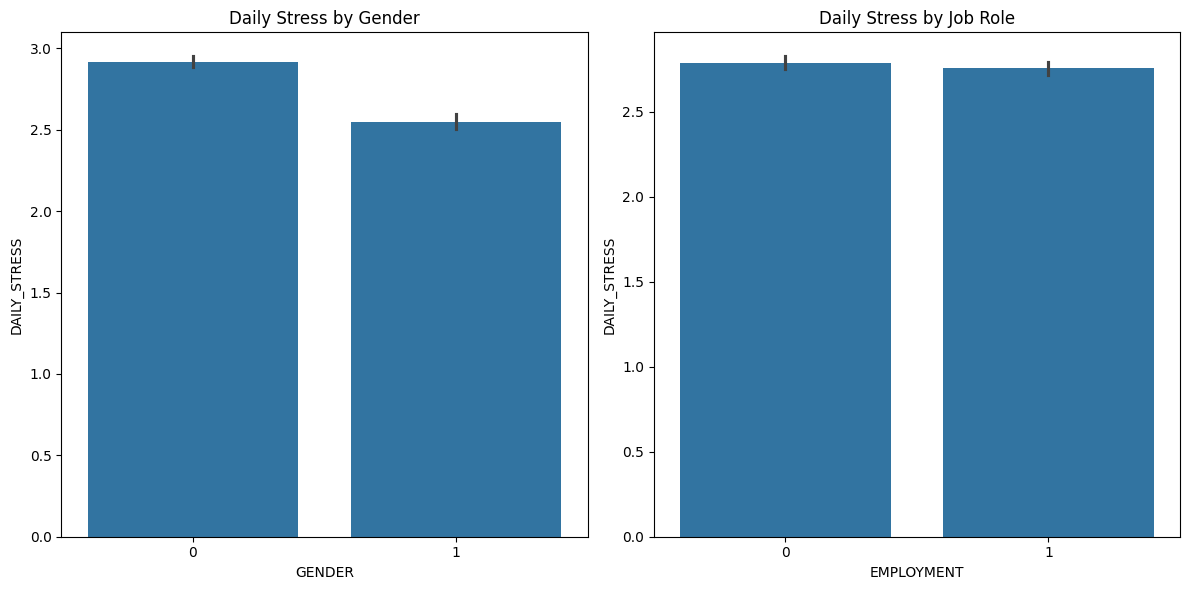

In [97]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='GENDER', y='DAILY_STRESS', data=df)
plt.title('Daily Stress by Gender')

plt.subplot(1, 2, 2)
sns.barplot(x='EMPLOYMENT', y='DAILY_STRESS', data=df)
plt.title('Daily Stress by Job Role')

plt.tight_layout()
plt.show()

### Determining who dedicates more time to hobbies, men or women

In [98]:
hobby_time = df.groupby('GENDER')['TIME_FOR_HOBBY'].mean()
print("Average time for hobbies:")
print(hobby_time)

Average time for hobbies:
GENDER
0    3.202676
1    3.334009
Name: TIME_FOR_HOBBY, dtype: float64


### Heatmap to determine attributes highly correlated with WLB score

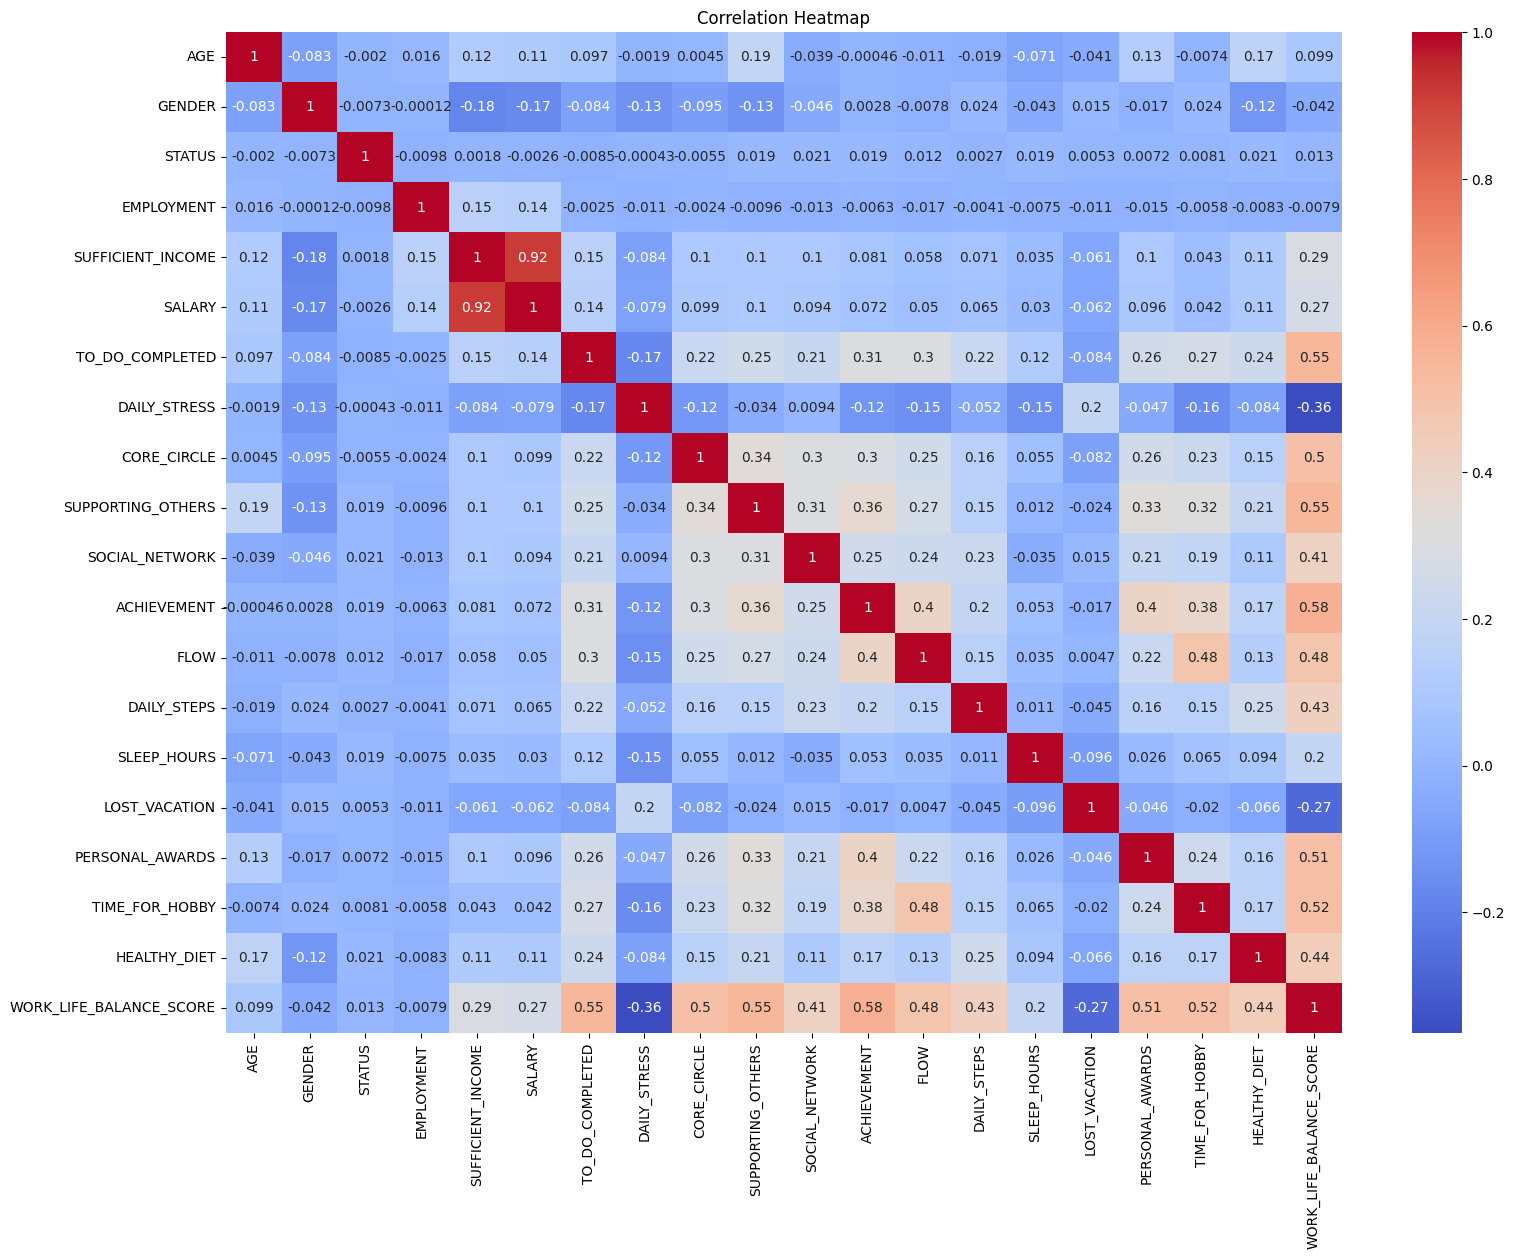

In [99]:
plt.figure(figsize=(18, 13))
corr = df.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 10}, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Train the model

In [101]:
x = df.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = df['WORK_LIFE_BALANCE_SCORE']

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [103]:
x_train.head()

,AGE,GENDER,STATUS,EMPLOYMENT,SUFFICIENT_INCOME,SALARY,TO_DO_COMPLETED,DAILY_STRESS,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,FLOW,DAILY_STEPS,SLEEP_HOURS,LOST_VACATION,PERSONAL_AWARDS,TIME_FOR_HOBBY,HEALTHY_DIET
7681,34,1,1,0,2,2,2,3,3,4,4,2,3,5,7,2,3,1,2
9031,24,1,0,1,1,0,4,2,5,2,2,2,5,2,7,10,3,4,3
3691,49,0,0,1,2,2,10,5,5,10,5,5,9,10,8,2,3,5,3
202,34,1,3,1,1,1,7,1,8,10,5,0,8,7,8,0,10,10,2
5625,34,0,1,1,2,2,9,3,4,6,10,0,1,4,8,0,1,8,4


In [104]:
from sklearn.linear_model import LinearRegression 
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [105]:
y_pred = ml.predict(x_test)
predicted_value = ml.predict([[49,0,2,1,2,2,5,3,3,8,10,5,2,5,8,2,3,2,2]])
actual_value = df.loc[1,'WORK_LIFE_BALANCE_SCORE']

print(predicted_value, actual_value)

[661.40685916] 655.6


c:\Users\basse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [106]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8835964709242671

Text(0.5, 1.0, 'Actual vs. Predicted')

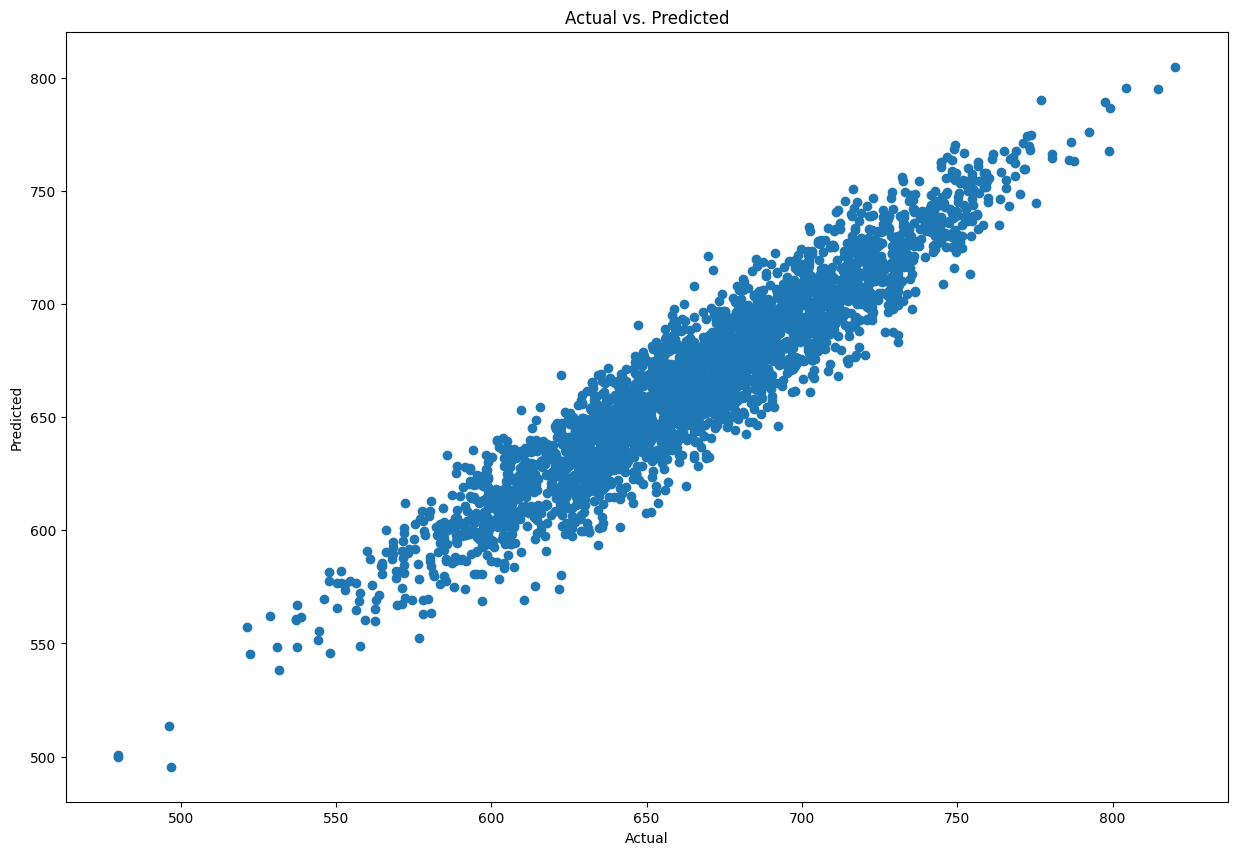

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [108]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
9394,619.7,620.994394,-1.294394
898,666.6,639.061690,27.538310
2398,641.6,615.370549,26.229451
5906,679.0,667.826655,11.173345
2343,622.4,668.879059,-46.479059
8225,710.8,733.432187,-22.632187
5506,700.2,699.999215,0.200785
6451,665.1,676.920852,-11.820852
2670,708.3,699.946359,8.353641
3497,682.2,681.028563,1.171437


In [109]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary2())

                            Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared (uncentered): 0.993      
Dependent Variable:     WORK_LIFE_BALANCE_SCORE AIC:                         108721.0971
Date:                   2024-02-06 15:22        BIC:                         108858.0936
No. Observations:       10000                   Log-Likelihood:              -54342.    
Df Model:               19                      F-statistic:                 7.591e+04  
Df Residuals:           9981                    Prob (F-statistic):          0.00       
R-squared (uncentered): 0.993                   Scale:                       3078.9     
-------------------------------------------------------------------------------------------
                          Coef.      Std.Err.       t        P>|t|      [0.025      0.975] 
-------------------------------------------------------------------------------------------
AGE                        2.5195      0.

In [110]:
x2 = x.drop(['AGE'], axis=1)
model2 = sm.OLS(y, x2).fit()

In [111]:
print(model2.summary2())

                            Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared (uncentered): 0.992      
Dependent Variable:     WORK_LIFE_BALANCE_SCORE AIC:                         110677.2208
Date:                   2024-02-06 15:22        BIC:                         110807.0069
No. Observations:       10000                   Log-Likelihood:              -55321.    
Df Model:               18                      F-statistic:                 6.579e+04  
Df Residuals:           9982                    Prob (F-statistic):          0.00       
R-squared (uncentered): 0.992                   Scale:                       3744.5     
-------------------------------------------------------------------------------------------
                          Coef.      Std.Err.       t        P>|t|      [0.025      0.975] 
-------------------------------------------------------------------------------------------
GENDER                    37.2909      1.